# PS4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
from datetime import datetime 
import yahoo_fin.options as options
from scipy.stats import norm

new_line = '\n'
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set(font_scale=1.5, rc={'text.usetex' : True,})

In [3]:
# def binoEuro_slow(s0,u,d,N,k,r,T,option_type):
#     """
#     s0: stock price
#     u: probability of going up
#     d: probability of going down
#     N: number of periods
#     """
#     dt = T/N
#     p = (np.exp(r*dt)-d)/(u-d)  # risk-neutral probability
#     disc = np.exp(-r*dt)        # discount back
 
#     S = np.zeros(N+1)           # N -period, every period has N+1 nodes
#     S[N] = s0*d**N              # last botton node
    
#     for j in range(N-1,-1,-1):  #find the stock prices in last period
#         S[j] = S[j+1]*u/d  
     
#     C = np.zeros(N+1)           #find the call payoff of each price node
#     for j in range(N+1):
#         if option_type.lower() =='c':
#             C[j] = max(S[j]-k,0)
#         else:
#             C[j] = max(k-S[j],0)

#     for i in range(N,0,-1):     # step backwards, find payoff of previous period
#         for j in range(i):
#             C[j] = disc * (p *(C[j]) + (1-p)*C[j+1])

#     return C[0]

# binoEuro_slow(s0=34,u=1.25,d=0.7,N=2,r=0.03,k=30,T=2,option_type='C')

In [4]:
# def binoEuro_fast(s0,u,d,N,k,r,T,option_type):
#     """
#     s0: stock price
#     u: probability of going up
#     d: probability of going down
#     N: number of periods
#     """
#     dt = T/N
#     p = (np.exp(r*dt)-d)/(u-d)  # risk-neutral probability
#     disc = np.exp(-r*dt)        # discount back
    
#     S =s0* u**np.arange(0,N+1,1)*d**np.arange(N,-1,-1)         # stock prices at last step
#     S = S[::-1]
   
#     if option_type.lower() =='c':
#         S = np.maximum(S-k, np.zeros(N+1))
#     else:
#         S = np.maximum(k-S, np.zeros(N+1))
        
#     for i in range(N,0,-1):     # step backwards, find payoff of previous period
#         S = disc*(p*S[0:i] +(1-p)*S[1:i+1])

#     return S[0]
# binoEuro_fast(s0=34,u=1.25,d=0.7,N=2,r=0.03,k=30,T=2,option_type='C')

In [5]:
# def binoAmer_slow(s0,u,d,N,k,r,T,option_type):
#     dt = T/N
#     p = (np.exp(r*dt)-d)/(u-d)
#     disc = np.exp(-r*dt) 
    
#     S = np.zeros(N+1)        # stock prices at last step
#     for j in range(0,N+1):
#         S[j] = s0*u**j*d**(N-j)
        
#     C = np.zeros(N+1)  
#     for j in range(0,N+1):
#         if option_type.lower()=='c':
#             C[j] = max(S[j]-k,0)
#         else:
#             C[j] = max(k-S[j],0)
 
#     for i in np.arange(N-1,-1,-1):
#         for j in range(0,i+1):
#             S = s0 *u**j*d**(i-j)
#             C[j] = disc * (p * C[j+1] + (1-p)* C[j])
#             if option_type.lower()=='c':
#                 C[j] = max(S-k,C[j])
#             else:
#                 C[j] = max(k-S,C[j])
 
#     return C[0]

In [6]:
# s0=100
# u=1.1
# d=1/u
# N=3
# k=100
# r=0.06
# T=1
# dt = T/N
# p = (np.exp(r*dt)-d)/(u-d)
# disc = np.exp(-r*dt)

# S = np.zeros(shape=(N+1,N+1))
# CV = np.zeros(shape=(N+1,N+1))
# EV = np.zeros(shape=(N+1,N+1))

# S[0][0] = s0

# for i in range(N):
#     for j in range(i,N):
#         S[i][j+1] = S[i][j]*u
#         S[i+1][j+1] = S[i][j]*d
#         EV[i][j+1] = max(k-S[i][j+1],0)
#         EV[i+1][j+1] = max(k-S[i+1][j+1],0)

# for i in range(N,0,-1):
#     for j in range(i,N+1):
#         CV[i-1][j-1] = disc * (p*EV[i-1][j] + (1-p)* EV[i][j])

In [7]:
# def binoAmer_fast(s0,u,d,N,k,r,T,option_type):
#     dt = T/N
#     p = (np.exp(r*dt)-d)/(u-d)
#     disc = np.exp(-r*dt) 
    
#     S = s0* u**np.arange(0,N+1,1)*d**np.arange(N,-1,-1)       # stock prices at last step

#     if option_type.lower()=='c':
#         C = np.maximum(0,S - k)
#     else:
#         C = np.maximum(0,k - S)
   
#     for i in np.arange(N-1,-1,-1):
#         S = s0* u**np.arange(0,i+1,1)*d**np.arange(i,-1,-1)
#         print(S)
#         C[:i+1] = disc * (p * C[1:i+2] + (1-p)* C[0:i+1])
#         print(C)
#         C = C[:-1]
       
#         if option_type.lower()=='c':
#             C = np.maximum(C,S - k)
#         else:
#             C = np.maximum(C,k - S)
        
#     return C[0]

In [1]:
# def AmericanPut_Matrix(s0,u,d,N,k,r,T,option_type):
#     dt = T/N
#     p = (np.exp(r*dt)-d)/(u-d)

#     disc = np.exp(-r*dt)
    
#     S = np.zeros(shape=(N+1,N+1))
#     CV = np.zeros(shape=(N+1,N+1))
#     EV = np.zeros(shape=(N+1,N+1))

#     S[0][0] = s0

#     for i in range(N):
#         for j in range(i,N):
#             S[i][j+1] = S[i][j]*u
#             S[i+1][j+1] = S[i][j]*d
    
    
#     for i in range(N,0,-1):
#         for j in range(i,N+1):
#             EV[i][j] = max(k-S[i][j],0)
#             CV[i-1][j-1] = disc * (p*EV[i-1][j] + (1-p)* EV[i][j])
#             CV[i][j] = max(CV[i][j],EV[i][j])
#             CV[i-1][j-1] = disc * (p*CV[i-1][j] + (1-p)* CV[i][j])

#     CV[0][0] = disc * (p*CV[0][1] + (1-p)* CV[1][1])
    
#     return CV[0][0],CV

# AmericanPut_Matrix(s0=100,u=1.1,d=1/1.1,N=3,k=100,r=0.06,T=1,option_type='p')

In [2]:
def parameters(r,sigma,N,T,formula):
    dt = T/N
    if formula == 'a':
        c = 0.5 * (np.exp(-r*dt) + np.exp( (r+sigma**2)*dt) )
        d = c - np.sqrt(c**2 -1)
        u = 1/d
        p = (np.exp(r*dt) -d) / (u-d)
    elif formula == 'b':
        u = np.exp(r*dt)*(1+np.sqrt(np.exp(sigma**2*dt)-1))
        d = np.exp(r*dt)*(1-np.sqrt(np.exp(sigma**2*dt)-1))
        p = 0.5
    elif formula =='c':
        u = np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt))
        d = np.exp((r-sigma**2/2)*dt - sigma*np.sqrt(dt))
        p=0.5
    elif formula =='d':
        u = np.exp(sigma*np.sqrt(dt))
        d = np.exp(-sigma*np.sqrt(dt))
        p = 1/2 + 1/2*((r-sigma**2/2)*np.sqrt(dt))/sigma
    
    return u, d, p, N

In [3]:
def binoEuro_slow(s0,N,k,r,T,sigma,option_type,formula):
    """
    s0: stock price
    u: probability of going up
    d: probability of going down
    N: number of periods
    """
    dt = T/N
    params = parameters(r,sigma,N,T,formula)
    u = params[0]
    d = params[1]
    p = params[2]
    
    disc = np.exp(-r*dt)        # discount back
 
    S = np.zeros(N+1)           # N -period, every period has N+1 nodes
    S[N] = s0*d**N              # last botton node
    
    for j in range(N-1,-1,-1):  #find the stock prices in last period
        S[j] = S[j+1]*u/d  
     
    C = np.zeros(N+1)           #find the call payoff of each price node
    for j in range(N+1):
        if option_type.lower() =='c':
            C[j] = max(S[j]-k,0)
        else:
            C[j] = max(k-S[j],0)

    for i in range(N,0,-1):     # step backwards, find payoff of previous period
        for j in range(i):
            C[j] = disc * (p *(C[j]) + (1-p)*C[j+1])

    return C[0]

In [4]:
def binoEuro_fast(s0,N,k,r,T,sigma,option_type,formula):
    """
    s0: stock price
    u: probability of going up
    d: probability of going down
    N: number of periods
    """
    dt = T/N
    params = parameters(r,sigma,N,T,formula)
    u = params[0]
    d = params[1]
    p = params[2]
    
    disc = np.exp(-r*dt)        # discount back
    
    S =s0* u**np.arange(0,N+1,1)*d**np.arange(N,-1,-1)         # stock prices at last step
    S = S[::-1]
   
    if option_type.lower() =='c':
        S = np.maximum(S-k, np.zeros(N+1))
    else:
        S = np.maximum(k-S, np.zeros(N+1))
        
    for i in range(N,0,-1):     # step backwards, find payoff of previous period
        S = disc*(p*S[0:i] +(1-p)*S[1:i+1])

    return S[0]

In [5]:
# def AmericanPut_Matrix(s0,N,k,r,T,sigma,option_type,formula):
#     dt = T/N
#     params = parameters(r,sigma,N,T,formula)
#     u = params[0]
#     d = params[1]
#     p = params[2]
#     disc = np.exp(-r*dt)
    
#     S = np.zeros(shape=(N+1,N+1))
#     CV = np.zeros(shape=(N+1,N+1))
#     EV = np.zeros(shape=(N+1,N+1))

#     S[0][0] = s0

#     for i in range(N):
#         for j in range(i,N):
#             S[i][j+1] = S[i][j]*u
#             S[i+1][j+1] = S[i][j]*d

#     for i in range(N,0,-1):
#         for j in range(i,N+1):
#             EV[i][j] = max(k-S[i][j],0)
#             CV[i-1][j-1] = disc * (p*EV[i-1][j] + (1-p)* EV[i][j])
#             CV[i][j] = max(CV[i][j],EV[i][j])
#             CV[i-1][j-1] = disc * (p*CV[i-1][j] + (1-p)* CV[i][j])

#     CV[0][0] = disc * (p*CV[0][1] + (1-p)* CV[1][1])
    
#     return CV[0][0]


In [6]:
def binoAmer_fast(s0,N,k,r,T,sigma,option_type,formula):
    dt = T/N
    params = parameters(r,sigma,N,T,formula)
    u = params[0]
    d = params[1]
    p = params[2]
    disc = np.exp(-r*dt)
    
    S = s0* u**np.arange(0,N+1,1)*d**np.arange(N,-1,-1)       # stock prices at last step

    if option_type.lower()=='c':
        C = np.maximum(0,S - k)
    else:
        C = np.maximum(0,k - S)
   
    for i in np.arange(N-1,-1,-1):
        S = s0* u**np.arange(0,i+1,1)*d**np.arange(i,-1,-1)
   
        C[:i+1] = disc * (p * C[1:i+2] + (1-p)* C[0:i+1])
   
        C = C[:-1]
       
        if option_type.lower()=='c':
            C = np.maximum(C,S - k)
        else:
            C = np.maximum(C,k - S)
        
    return C[0]

## 1. Compare the convergence rates of the four methods below by doing the following:
Use the Binomial Method to price a 6-month European Call option with the following information: the risk-free interest rate is 5% per annum; the volatility is 24% per annum; the current stock price is 32; and the strike price is $30. Divide the time interval into 𝑛 parts to estimate the price of this option. Use 𝑛 = 10,20,40,80,100,200, and 500 to estimate the price and draw all resulting prices in one graph, where the horizontal axis measures 𝑛, and the vertical one the price of the option.

__(a)__

$\mu = \frac{1}{d},~~~~~~~~~ d = c-\sqrt{c^2-1} ~~~~~~~~~c=\frac{1}{2}(e^{-r\Delta}+e^{(r+\sigma^2)\Delta}),~~~~~~~~p=\frac{e^{r\Delta}-d}{u-d}$

__(b)__

$\mu = e^{r\Delta}(1+\sqrt{e^{\sigma^2\Delta}-1}),~~~~~~~~~ d = e^{r\Delta}(1-\sqrt{e^{\sigma^2\Delta}-1}) ~~~~~~~~~~~~~~p=\frac{1}{2}$

__(c)__

$\mu = e^{(r-\frac{\sigma^2}{2})\Delta+\sigma\Delta} ~~~~~~ d = e^{(r-\frac{\sigma^2}{2})\Delta-\sigma\Delta}~~~~~~~p=\frac{1}{2}$

__(d)__

$\mu = e^{\sigma\sqrt{\Delta}} ~~~~~~ d =e^{-\sigma\sqrt\Delta}~~~~~~~ p= \frac{1}{2}+\frac{1}{2}(\frac{(r-\frac{\sigma^2}{2})\sqrt\Delta}{\sigma})$

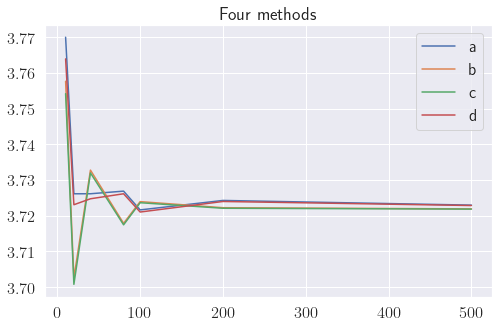

In [14]:
T = 0.5
rf = 0.05
sigma = 0.24
s0 = 32
N = [10,20,40,80,100,200,500]
k=30

a_call = [binoEuro_fast(s0=s0,k=k,T=T,sigma=sigma,r=rf,N=i,option_type='c',formula='a') for i in N]
b_call = [binoEuro_fast(s0=s0,k=k,T=T,sigma=sigma,r=rf,N=i,option_type='c',formula='b') for i in N]
c_call = [binoEuro_fast(s0=s0,k=k,T=T,sigma=sigma,r=rf,N=i,option_type='c',formula='c') for i in N]
d_call = [binoEuro_fast(s0=s0,k=k,T=T,sigma=sigma,r=rf,N=i,option_type='c',formula='d') for i in N]

question_1 = pd.DataFrame(list(zip(N,a_call,b_call,c_call,d_call)))
question_1.columns=['Steps','a','b','c','d']
question_1 = question_1.set_index('Steps')

plt.figure(figsize=(8,5))
plt.plot(question_1.iloc[:,:])
plt.legend(['a','b','c','d'])
plt.title('Four methods')

plt.show()

<Figure size 432x288 with 0 Axes>

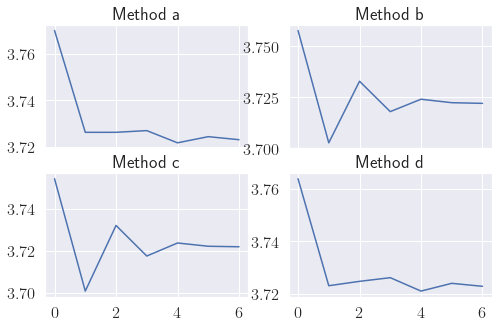

In [15]:
plt.figure()

fig, axs = plt.subplots(2, 2,sharex=True)
fig.set_figheight(5)
fig.set_figwidth(8)

axs[0, 0].plot(a_call)
axs[0, 0].set_title('Method a')

axs[0, 1].plot(b_call)
axs[0, 1].set_title('Method b')

axs[1, 0].plot(c_call)
axs[1, 0].set_title('Method c')

axs[1, 1].plot(d_call)
axs[1, 1].set_title('Method d')


plt.show()

## 2. 
    Take the current price of AMZN. Use risk-free rate of 1% per annum, and a strike price that is the closest integer to 110% of the current price (divisible by 50). Estimate the price of the American Call option that expires in January of next year, using the Binomial Method. AMZN does not pay dividends. To estimate the historical volatility, use 60 months of historical stock price data on the company. You may use Bloomberg or finance.yahoo.com to obtain historical prices and the current stock price of AMZN.


In [4]:
# last 60 months data
amzn = yf.download("AMZN", start="2017-04-27", end="2022-04-27")

[*********************100%***********************]  1 of 1 completed


In [5]:
amzn['return'] = amzn['Adj Close'].pct_change(1)
amzn_std_daily = np.std(amzn['return'])
amzn_std =amzn_std_daily*np.sqrt(252)

In [18]:
rf = 0.01
current_price = amzn.tail(1)['Adj Close'][0]
strike_price = round(current_price*1.1) //10 * 10 -10

# AMZN Jan 2023 1360.000 call expire on 2023-01-20
expire_date = datetime(2023,1,20)
curr_date = amzn.tail(1).index[0]
date_diff = int(str(expire_date - curr_date).split()[0])
N = date_diff
T = N/365

print("AMZN Jan 2023 call expire on 2023-01-20")
print(f"The current price as of April 27 is {current_price}")
print(f"The current volatility as of April 27 is {amzn_std*100}%")
print(f"The strike price we choose is {strike_price}")
print(f"Days until expire is {date_diff}")


AMZN Jan 2023 call expire on 2023-01-20
The current price as of April 27 is 2787.820068359375
The current volatility as of April 27 is 31.47985505575901%
The strike price we choose is 3050
Days until expire is 269


In [14]:
amzn_estimated = binoAmer_fast(s0=current_price,k=strike_price,r=rf,N=N,T=T,sigma=amzn_std,option_type='c',formula='a')

print(f'The etimated Amazon call price is {amzn_estimated}')

The etimated Amazon call price is 207.12028952948447


__I choose the market option price is 302.75 with strike price of 3050, in which the strike price is closest to my strike price 3050.__



In [15]:
def d(s0,k,t,sigma,r):
    d1 = 1/(sigma*np.sqrt(t)) * (np.log(s0/k)+(r+1/2*sigma**2)*t)
    d2 = d1 - sigma*np.sqrt(t)
    return d1, d2

def BS_call(s0,k,t,sigma,r):
    d1,d2 = d(s0,k,t,sigma,r)
    call = norm.cdf(d1) * s0 - norm.cdf(d2)*k*np.exp(-r*t)
    
    return call

BS_call(s0=current_price,k=strike_price,t=T,sigma=amzn_std,r=rf)

207.0038759638444

In [19]:
target  = 302.75

eps= 0.001
count = 0
max_iter = 1500
vol = amzn_std
i =0
while abs(amzn_estimated-target)>0.01:
    if (amzn_estimated>target):
        vol -= eps
    else:
        vol += eps
    
    amzn_estimated = binoAmer_fast(s0=current_price,k=strike_price,r=rf,N=N,T=T,sigma=vol,option_type='c',formula='a')
    i+=1
    if i==max_iter:
        break


In [20]:
new_amzn_std = vol
print(f'The volatility should be about {round(new_amzn_std*100,2)}% to make the estimated price equal to the market price.')

The volatility should be about 41.48% to make the estimated price equal to the market price.


## 3. Consider the following information on the stock of a company and options on it: 
    S0 = 49, x = 50, r = 0.03, 𝜎 = 0.2, T= 0.3846 (20 weeks), 𝜇 = 0.14.
    Using the Binomial Method (any one of the parameter choices) estimate the following and draw the graphs:

In [17]:
s0 = 49
k = 50
rf = 0.03
sigma = 0.2
T = 0.3846
mu = 0.14

s0_range= np.arange(20,82,2)
T_range = np.arange(0,0.3846,0.01)
N = len(s0_range)

In [18]:
delta_s0 = np.zeros(N)
delta_t = np.zeros(len(T_range))
gamma = np.zeros(N)
vega = np.zeros(N)
theta = np.zeros(N)
rho = np.zeros(N)

price= np.zeros(N)
for i in range(len(s0_range)):
    price[i] =  binoEuro_fast(s0=s0_range[i],k=k,T=T,sigma=sigma,r=rf,N=N,option_type='c',formula='a')
    delta_s0[i] = (binoEuro_fast(s0=s0_range[i]+1,k=k,T=T,sigma=sigma,r=rf,N=N,option_type='c',formula='a') - \
               binoEuro_fast(s0=s0_range[i],k=k,T=T,sigma=sigma,r=rf,N=N,option_type='c',formula='a'))/1
    gamma[i] = (binoEuro_fast(s0=s0_range[i]+1,k=k,T=T,sigma=sigma,r=rf,N=N,option_type='c',formula='a') +\
                binoEuro_fast(s0=s0_range[i]-1,k=k,T=T,sigma=sigma,r=rf,N=N,option_type='c',formula='a') - \
          2*binoEuro_fast(s0=s0_range[i],k=k,T=T,sigma=sigma,r=rf,N=N,option_type='c',formula='a'))/1
    vega[i] = (binoEuro_fast(s0=s0_range[i],k=k,T=T,sigma=sigma+0.01,r=rf,N=N,option_type='c',formula='a') - \
        binoEuro_fast(s0=s0_range[i],k=k,T=T,sigma=sigma,r=rf,N=N,option_type='c',formula='a'))/0.01
    theta[i] = -(binoEuro_fast(s0=s0_range[i],k=k,T=T+0.01,sigma=sigma,r=rf,N=N,option_type='c',formula='a')- \
                 binoEuro_fast(s0=s0_range[i],k=k,T=T,sigma=sigma,r=rf,N=N,option_type='c',formula='a'))/0.01
    rho[i] = (binoEuro_fast(s0=s0_range[i],k=k,T=T,sigma=sigma,r=rf+0.01,N=N,option_type='c',formula='a') - \
              binoEuro_fast(s0=s0_range[i],k=k,T=T,sigma=sigma,r=rf,N=N,option_type='c',formula='a'))/0.01
    
price= np.zeros(len(T_range))
for i in range(len(T_range)):
    price[i] =  binoEuro_fast(s0=s0,k=k,T=T_range[i],sigma=sigma,r=rf,N=N,option_type='c',formula='a')
    delta_t[i] = (binoEuro_fast(s0=s0+1,k=k,T=T_range[i],sigma=sigma,r=rf,N=N,option_type='c',formula='a') - \
                 price[i])/1

<Figure size 432x288 with 0 Axes>

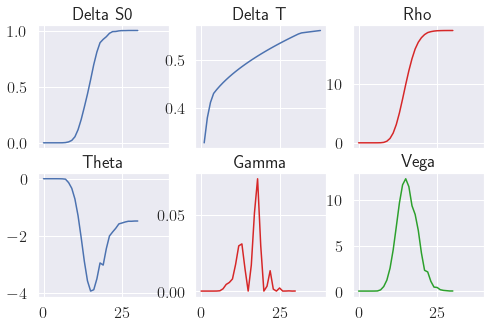

In [19]:
plt.figure()

fig, axs = plt.subplots(2, 3,sharex=True)
fig.set_figheight(5)
fig.set_figwidth(8)

axs[0, 0].plot(delta_s0)
axs[0, 0].set_title('Delta S0')

axs[0, 1].plot(delta_t)
axs[0, 1].set_title('Delta T')

axs[1, 0].plot(theta)
axs[1, 0].set_title('Theta')

axs[1, 1].plot(gamma, 'tab:red')
axs[1, 1].set_title('Gamma')

axs[1, 2].plot(vega, 'tab:green')
axs[1, 2].set_title('Vega')

axs[0, 2].plot(rho, 'tab:red')
axs[0, 2].set_title('Rho')

plt.show()

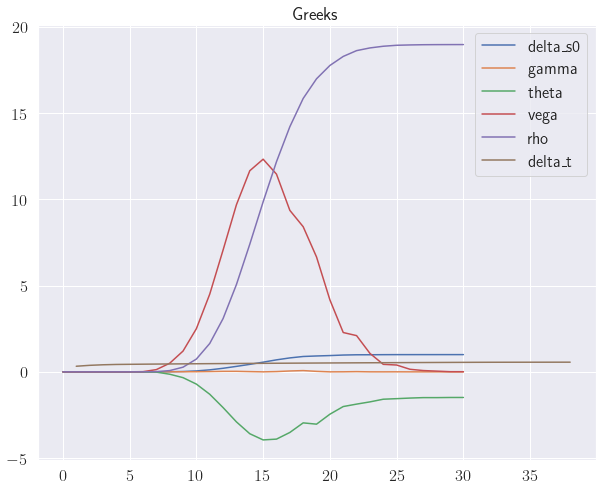

In [63]:
plt.figure(figsize=(10,8))

plt.plot(delta_s0)
plt.plot(gamma)
plt.plot(theta)
plt.plot(vega)
plt.plot(rho)
plt.plot(delta_t)
plt.legend(['delta_s0','gamma','theta','vega','rho','delta_t'])
plt.title('Greeks')

plt.show()


## 4. Consider 12-month put options on a stock of company XYZ. Assume the risk-free rate is 5%/annum, the volatility of the stock price is 30 % /annum, and the strike price of the option is 100. Use a Binomial Method to estimate the prices of European and American Put options with current stock prices varying from 80 to 120 in increments of 4. Draw them all in one graph, compare them and comment on your findings.

In [64]:
rf = 0.05
sigma = 0.3
k = 100
T = 1

s0_range = np.arange(80,124,4)
N = len(s0_range)

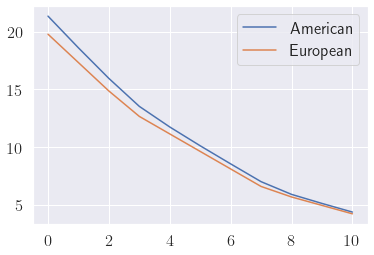

In [65]:
am_put = [binoAmer_fast(s0=i,N=N,k=k,r=rf,T=T,sigma=sigma,option_type='p',formula='c') for i in s0_range]
eu_put = [binoEuro_fast(s0=i,N=N,k=k,r=rf,T=T,sigma=sigma,option_type='p',formula='c') for i in s0_range]

plt.figure()

plt.plot(am_put)
plt.plot(eu_put)

plt.legend(['American','European'])
plt.show()

## 5. Compare the convergence rates of the two methods, 
    (a) and (b) described below, by doing the following: Use the Trinomial Method to price a 6-month European Call option with the following information:
    the risk-free interest rate is 5% per annum, the volatility is 24%/annum, the current stock price is 32, and the strike price is 30.
    Divide the time interval into 𝑛 equal parts to estimate the price of this option. Use n = 10, 15, 20, 40, 70, 80, 100, 200 and 500 to estimate the price and draw them all in one graph, where the horizontal axis measures 𝑛, and the vertical one measures the price of the option.
    The two methods are in (a) and (b) below:

In [90]:
T=0.5
rf = 0.05
sigma = 0.24
s0 = 32
k =30

N= [10,15,20,40,70,80,100,200,5000]

__(a) Use the trinomial method applied to the stock price-process (𝑆𝑡) in which__

$u = \frac{1}{d}$, $d = e^{-\sigma\sqrt{3\Delta}}$, $p_d = \frac{r\Delta(1 - u) + (r\Delta)^2 + \sigma^2\Delta}{(u-d)(1-d)}$ ,
$p_u = \frac{r\Delta(1 - d) + (r\Delta)^2 + \sigma^2\Delta}{(u-d)(u-1)}$, $p_m = 1 - p_u - p_d$

__(b) Use the trinomial method applied to the Log-stock price-process ($X_t$) in which__

$\Delta X_u = \sigma\sqrt{3\Delta}$, $\Delta X_d = -\sigma\sqrt{3\Delta}$, $p_u = \frac{1}{2}\bigg(\frac{\sigma^2\Delta +\big(r−\frac{\sigma^2}{2}\big)^2 \Delta^2}{\Delta X_u ^2} + \frac{(r−\frac{\sigma^2}{2}) \Delta}{\Delta X_u}\bigg)$, $p_d = \frac{1}{2}\bigg(\frac{\sigma^2\Delta +\big(r−\frac{\sigma^2}{2}\big)^2 \Delta^2}{\Delta X_u ^2} - \frac{(r−\frac{\sigma^2}{2}) \Delta}{\Delta X_u}\bigg)$, $P_m = 1 - P_m - P_d$

In [91]:
# parameters
def trino_params(sigma,N,T,r):
    dt = T/N
    
    d = np.exp(-sigma*np.sqrt(3*dt))
    u = 1/d
    pd = (r*dt*(1-u) + (r*dt)**2 + sigma**2*dt)/((u-d)*(1-d))
    pu = (r*dt*(1-d) + (r*dt)**2 + sigma**2*dt)/((u-d)*(u-1))
    pm = 1-pu-pd

    return pu,pd,pm,u,d

def trinoLog_params(sigma,T,N,r):
    dt = T/N
    dxu = sigma*np.sqrt(3*dt)
    dxd = -sigma*np.sqrt(3*dt)
    pu = 1/2 * ((sigma**2*dt + (r-sigma**2/2)**2*dt**2)/dxu**2 + (r-sigma**2/2)*dt/dxu )
    pd = 1/2 * ((sigma**2*dt + (r-sigma**2/2)**2*dt**2)/dxu**2 - (r-sigma**2/2)*dt/dxu )
    pm = 1 - pu - pd
    
    return pu,pd,pm,dxu,dxd


In [92]:
#Trinomial slow approach
def trinoEuro_slow(s0,N,k,r,T,sigma,option_type):
    """
    s0: stock price
    u: probability of going up
    d: probability of going down
    N: number of periods
    """
                   
    dt = T/N
    params = trino_params(sigma,N,T,r)
    pu = params[0]
    pd = params[1]
    pm = params[2]
    u = params[3]
    d = params[4]
 
    disc = np.exp(-r*dt)        # discount back
  
    S = np.zeros(2*N+1) 
    S[2*N] = s0*(d**N)
    for i in range(2*N-1,-1,-1):
        S[i] = S[i+1] * u
    C = np.zeros(2*N+1)
    for i in range(2*N-1,-1,-1):
        C[i] = max(0,S[i]-k)

    for i in range(N-1,-1,-1):
        for j in range(2*N-1):
            C[j] = (pu*C[j]+pm*C[j+1]+pd*C[j+2])*disc

    return C[0]
#trinoEuro_slow(s0=32,N=10,k=30,r=0.05,T=0.5,sigma=0.24,option_type='c')

In [93]:
# Trinomial fast approach
def trinoEuro_fast(s0,N,k,r,T,sigma,option_type):
    """
    s0: stock price
    u: probability of going up
    d: probability of going down
    N: number of periods
    """
                   
    dt = T/N
    params = trino_params(sigma,N,T,r)
    pu = params[0]
    pd = params[1]
    pm = params[2]
    u = params[3]
    d = params[4]
 
    disc = np.exp(-r*dt)        # discount back
  
    S = np.zeros(2*N+1) 
    S[2*N] = s0*(d**N)
    for i in range(2*N-1,-1,-1):
        S[i] = S[i+1] * u
    
    C = np.maximum(S-k,np.zeros(2*N+1))


    for i in range(0,N,1):     # step backwards, find payoff of previous period
        C = disc*(pu*C[:-2] +pm*C[1:-1] + pd*C[2:])

    return C[0]

# trinoEuro_fast(s0=32,N=10,k=30,r=0.05,T=0.5,sigma=0.24,option_type='c')

In [94]:
# Trinomial Log approach
def trinoEuroLog(s0,N,k,r,T,sigma,option_type):
    """
    s0: stock price
    u: probability of going up
    d: probability of going down
    N: number of periods
    """
                   
    dt = T/N
    params = trinoLog_params(sigma,T,N,r)
    pu = params[0]
    pd = params[1]
    pm = params[2]
    dxu = params[3]
    dxd = params[4]
 
    disc = np.exp(-r*dt)        # discount back
  
    S = np.zeros(2*N+1) 
    S[2*N] = np.exp(np.log(s0)+dxd*N)
    
    for i in range(2*N-1,-1,-1):
        S[i] = np.exp(np.log(S[i+1])+dxu)
    
    C = np.maximum(S-k,np.zeros(2*N+1))

    for i in range(0,N,1):     # step backwards, find payoff of previous period
        C = disc*(pu*C[:-2] +pm*C[1:-1] + pd*C[2:])

    return C[0]

# trinoEuroLog(s0=32,N=10,k=30,r=0.05,T=0.5,sigma=0.24,option_type='c')

In [95]:
a_trino = [trinoEuro_fast(s0=s0,N=i,k=k,r=rf,T=T,sigma=sigma,option_type='c') for i in N]
b_trino = [trinoEuroLog(s0=s0,N=i,k=k,r=rf,T=T,sigma=sigma,option_type='c') for i in N]

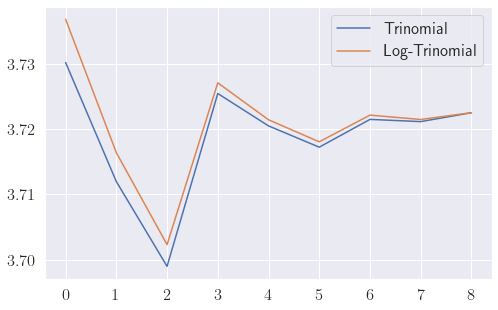

In [96]:
plt.figure(figsize=(8,5))

plt.plot(a_trino)
plt.plot(b_trino)
plt.legend(['Trinomial','Log-Trinomial'])
plt.show()

## 6. Use Halton’s Low-Discrepancy Sequences to price European Call options.

In [97]:
def halton_oneD(n,base):
    """
    One-dimensional Halton sequence 
    (the code is adopted from Brandimarte’s “Numerical methods in finance and economics: 
    a MATLAB-based introduction”)
    
    """
    sequence = np.zeros(n)
    numbits = int(1 + np.ceil(np.log(n)/np.log(base)))
    VetBase = [1/base**(i+1) for i in range(numbits)]
    WorkVet = np.zeros(numbits)
    for i in range(n):
        j=0
        ok = 0
        while ok==0:
            WorkVet[j] = WorkVet[j]+1
            if WorkVet[j] < base:
                ok = 1
            else:
                WorkVet[j] = 0
                j = j+1
        sequence[i] = np.dot(WorkVet,VetBase)
        
    return sequence

In [98]:
def Halton_Box_Muller(N,base1,base2):
    
    H1 = halton_oneD(N//2,base1)
    H2 = halton_oneD(N//2,base2)
    
    norm_variable = []

    i = 0
    j=N//2

    while i<j:
        u1 = H1[i]
        u2 = H2[i]

        z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
        z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

        norm_variable.append(z1)
        norm_variable.append(z2)

        i+=1
    return norm_variable

In [99]:
def EuroCall_Halton(s0,k,r,T,N,sigma,base1,base2):
    rv = Halton_Box_Muller(N,base1,base2)
    rv = np.array(rv)
    St = s0*np.exp((r-sigma**2/2)*T + sigma*np.sqrt(T)*rv)
    
    payoff = np.maximum(St-k, np.zeros(N))
    call = np.exp(-r*T) * np.mean(payoff)
    
    return call

In [100]:
call_price = EuroCall_Halton(s0=32,k=30,r=0.05,T=0.5,sigma=0.24,N=1000,base1=2,base2=5)
print(f"The estimated call price is: {call_price}")

The estimated call price is: 3.724505550012962
